# Week 3 - Graph Visualization
## Josh Iden  
## 2/10/23

![](HW2-1.png)

### Data Source  

This assignment uses Reptilia Tortoise Network data from [Network Repository](https://networkrepository.com/reptilia-tortoise-network-pv.php), containing animal interaction data from published studies of wild, captive, and domesticated animals. 

### Loading the Data  

In [1]:
import networkx as nx # to read, analyze, and visualize the data from pandas
import pandas as pd # to read and transform the edge data
import matplotlib.pyplot as plt # to customize the graph size
%matplotlib inline 

g = nx.read_edgelist('reptilia-tortoise-network-pv.edges', create_using=nx.MultiDiGraph(), nodetype=int, data=(('year',int),))

Because there are duplicate edges with different timestamps, we pass `nx.MultiDiGraph()` into the optional `create_using` argument. This took some time to understand. 

According to the dataset documentation, the network data contains 35 nodes and 104 edges. Let's check to see if this is what our graph object contains:

In [54]:
display(nx.info(g))

/var/folders/82/s2jpfjnx23x79yzgnlx3kx_h0000gp/T/ipykernel_36708/3289523897.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  display(nx.info(g))


'MultiDiGraph with 35 nodes and 104 edges'

It appears the data has been imported correctly. We can get a list of the nodes by passing the Graph object to the `nodes` function:

In [3]:
# return a list of nodes
nx.nodes(g)

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35))

We can get a list of node/edge pairs:

In [4]:
print(g.adj)

{1: {2: {0: {'year': 2005}}, 3: {0: {'year': 2005}}, 4: {0: {'year': 2005}}}, 2: {3: {0: {'year': 2005}}, 4: {0: {'year': 2005}, 1: {'year': 2010}}, 13: {0: {'year': 2008}}, 25: {0: {'year': 2010}}, 16: {0: {'year': 2011}}, 27: {0: {'year': 2011}}}, 3: {4: {0: {'year': 2005}, 1: {'year': 2010}}, 24: {0: {'year': 2010}}, 25: {0: {'year': 2010}}, 2: {0: {'year': 2010}}, 13: {0: {'year': 2010}}}, 4: {}, 5: {6: {0: {'year': 2005}}, 7: {0: {'year': 2005}}, 8: {0: {'year': 2005}}}, 6: {7: {0: {'year': 2005}}}, 7: {8: {0: {'year': 2005}}, 14: {0: {'year': 2009}}, 29: {0: {'year': 2012}, 1: {'year': 2013}}}, 8: {}, 9: {10: {0: {'year': 2005}}, 4: {0: {'year': 2005}}}, 10: {}, 11: {12: {0: {'year': 2008}, 1: {'year': 2011}, 2: {'year': 2012}, 3: {'year': 2013}}, 23: {0: {'year': 2010}, 1: {'year': 2012}, 2: {'year': 2013}}, 29: {0: {'year': 2012}}, 34: {0: {'year': 2013}}}, 12: {29: {0: {'year': 2012}}}, 13: {4: {0: {'year': 2009}}, 3: {0: {'year': 2011}}}, 14: {7: {0: {'year': 2008}, 1: {'year

We see the third column timestamp noted earlier. We can also measure the graphs **density**, ie, the ratio of non-zero cells to zero cells -- the lower the density, the larger the network:

In [119]:
round(nx.density(g), 7)

0.087395

This density does not match the value provided in the data documentation - 0.17479. This is another consequence of the timestamp column. I would like to drop this column from the edgelist, but upon consideration, the easiest way to do this is to create a dataframe of the edgelist in pandas, drop the timestamp column, and read the updated dataframe into a new Graph object:

In [63]:
# read in the edge file, columns by space
df = pd.read_csv('reptilia-tortoise-network-pv.edges', sep=' ', header=None)
df.head()

,0,1,2
0,1,2,2005
1,1,3,2005
2,1,4,2005
3,5,6,2005
4,5,7,2005


In [68]:
# subset the node-edge columns
df = df[[0,1]]

# read the new dataframe into a Graph object
G = nx.from_pandas_edgelist(df, 0, 1, create_using=nx.MultiGraph())
display(nx.info(G))

/var/folders/82/s2jpfjnx23x79yzgnlx3kx_h0000gp/T/ipykernel_36708/288811747.py:6: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  display(nx.info(G))


'MultiGraph with 35 nodes and 104 edges'

Now let's recheck the density. The expected value provided in the documentation is 0.17479:

In [121]:
round(nx.density(G), 5)

0.17479

Viewing the adjacency list again to see the edge-node pairs:

In [114]:
list(G.edges)

[(1, 2, 0),
 (1, 3, 0),
 (1, 4, 0),
 (2, 3, 0),
 (2, 3, 1),
 (2, 4, 0),
 (2, 4, 1),
 (2, 13, 0),
 (2, 18, 0),
 (2, 26, 0),
 (2, 24, 0),
 (2, 25, 0),
 (2, 16, 0),
 (2, 27, 0),
 (3, 4, 0),
 (3, 4, 1),
 (3, 16, 0),
 (3, 16, 1),
 (3, 17, 0),
 (3, 18, 0),
 (3, 18, 1),
 (3, 18, 2),
 (3, 24, 0),
 (3, 25, 0),
 (3, 25, 1),
 (3, 13, 0),
 (3, 13, 1),
 (3, 31, 0),
 (3, 31, 1),
 (4, 9, 0),
 (4, 15, 0),
 (4, 13, 0),
 (4, 18, 0),
 (4, 18, 1),
 (4, 24, 0),
 (4, 24, 1),
 (4, 24, 2),
 (4, 25, 0),
 (4, 25, 1),
 (4, 25, 2),
 (4, 28, 0),
 (4, 28, 1),
 (4, 33, 0),
 (4, 31, 0),
 (5, 6, 0),
 (5, 7, 0),
 (5, 8, 0),
 (6, 7, 0),
 (7, 8, 0),
 (7, 14, 0),
 (7, 14, 1),
 (7, 14, 2),
 (7, 14, 3),
 (7, 14, 4),
 (7, 29, 0),
 (7, 29, 1),
 (7, 35, 0),
 (9, 10, 0),
 (11, 12, 0),
 (11, 12, 1),
 (11, 12, 2),
 (11, 12, 3),
 (11, 23, 0),
 (11, 23, 1),
 (11, 23, 2),
 (11, 29, 0),
 (11, 34, 0),
 (12, 29, 0),
 (13, 18, 0),
 (13, 18, 1),
 (14, 29, 0),
 (14, 29, 1),
 (16, 17, 0),
 (16, 18, 0),
 (16, 27, 0),
 (16, 24, 0),
 (16, 25,

Now we can plot the graph:

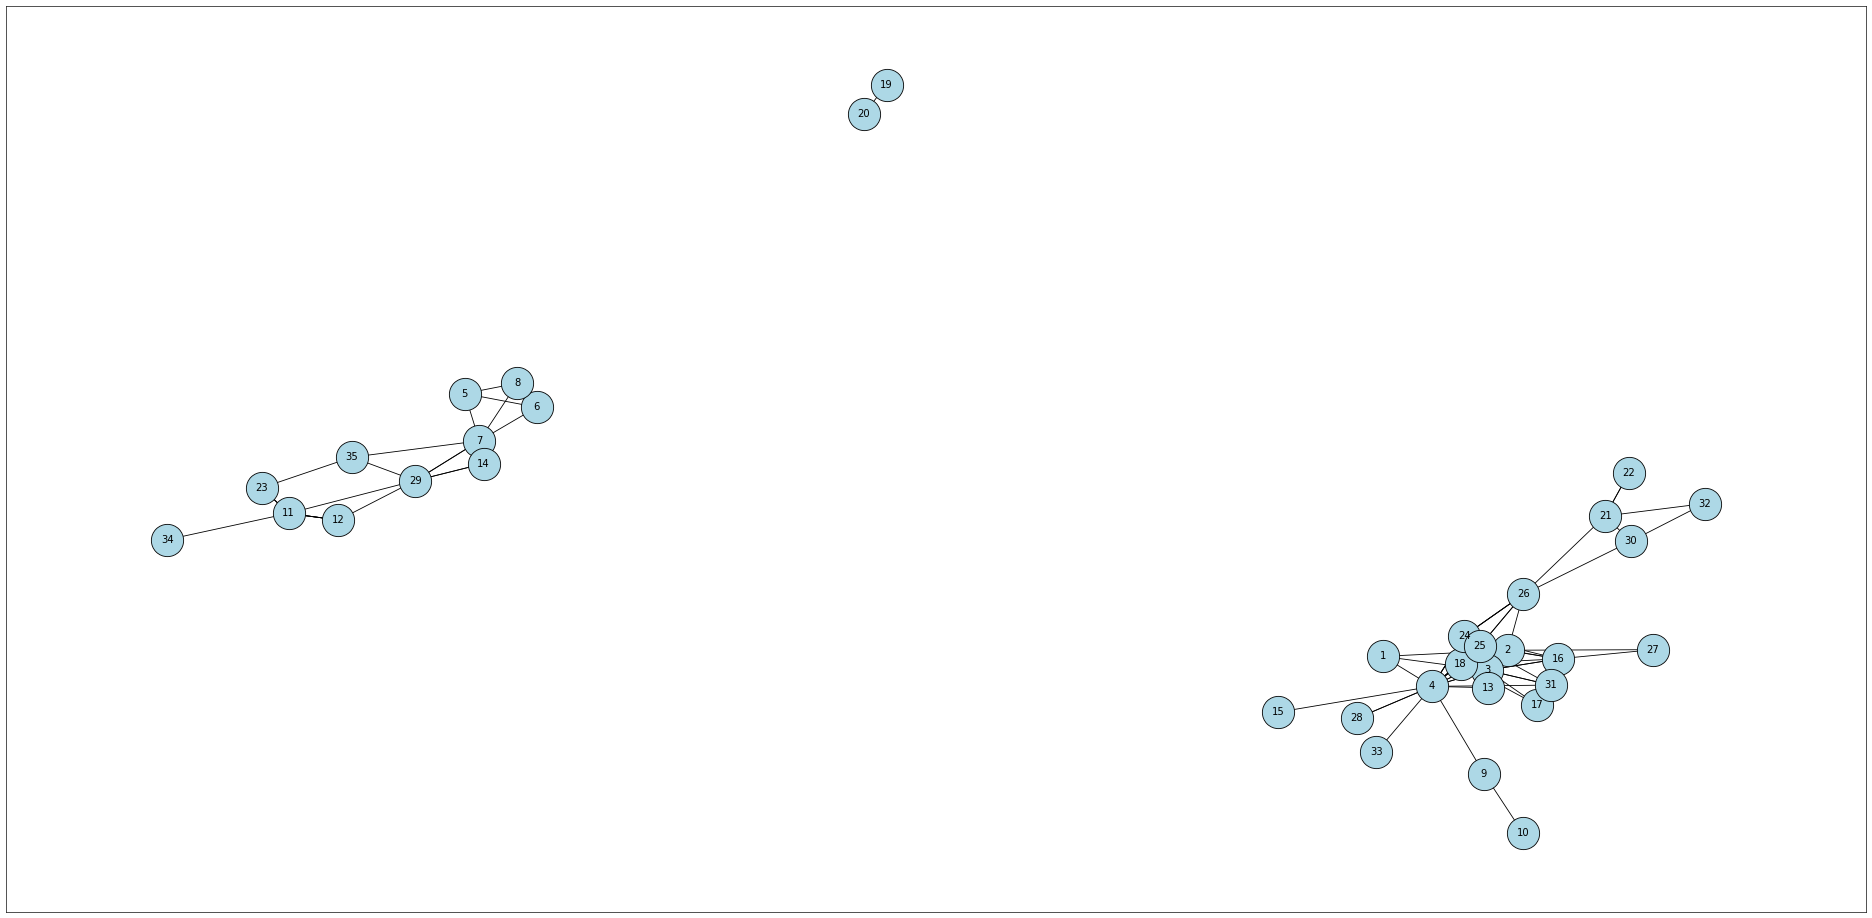

In [115]:
plt.figure(1, figsize=(40, 20), dpi=60)
nx.draw_networkx(G, with_labels = True, node_size=1500, node_color="#ADD8E6", edgecolors="#000000")

We see three clusters, with nodes 19 and 20 connected only to each other. Let's calculate the diameter of the graph:

In [116]:
nx.diameter(G)

NetworkXError: Found infinite path length because the graph is not connected

Networkx's built-in `diameter()` function returned the above error. A list comprehension I sourced from [stack overflow]('https://stackoverflow.com/questions/33114746/why-does-networkx-say-my-directed-graph-is-disconnected-when-finding-diameter') provided a workaround to calculate the maximum eccentricity of the graph, ie the largest number of vertices that must be traversed in order to travel from one vertex to another. 

In [117]:
diameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(G)])
diameter

6

The maximum distance between vertices in this graph is 6. We can also calculate the minimum, maximum, and average degrees in the graph:

In [138]:
degrees = []

for i, j in G.degree:
    degrees.append(j)
    
print("Minimum degree: ", min(degrees))
print("Maximum degree: ", max(degrees))
print("Average degree: ", round(sum(degrees)/len(degrees)))

Minimum degree:  1
Maximum degree:  20
Average degree:  6


### Findings

**Diameter**: The diameter of the graph is 6, representing that maximum number of vertices that must be traversed in order to travel from one vertex to another.

**Density**: The density of the graph is 0.17479. A density of 0 represents a graph with no edges, while a density of 1 represents a complete graph. However, a MultiGraph, as this is, can have a density of greater than 1. A lower density indicates a larger network. Considering that this is a multigraph, this seems like a very low number, but the graph is quite small. 

**Degrees**: Degrees represent the number of edges. The minimum degree of this graph is 1, the maximum is 20, and the average is 6. 

### Conclusion

The real challenge of this assignment was transforming the edge data for networkx. Being my first experience reading data into this package, I spent the large majority of my time understanding the data structures and how to leverage them. In the future when I read data into Networkx my first step will be to pull the data into pandas. 

Video presentation here: [https://youtu.be/4UVLSPGMtcQ](https://youtu.be/4UVLSPGMtcQ)  
